In [1]:
%pylab nbagg
from tvb.simulator.lab import *
import pandas as pd
import h5py

Populating the interactive namespace from numpy and matplotlib


In [2]:
#depressed brain 
Qvals= [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]
Qvals = np.array(Qvals)
oscilator = models.WilsonCowan(Q = Qvals)

In [3]:
white_matter = connectivity.Connectivity.from_file()
white_matter.speed = numpy.array([3.0])

WARNING  File 'hemispheres' not found in ZIP.


In [4]:
eqn_t = equations.PulseTrain()
eqn_t.parameters['onset'] = 0.0
eqn_t.parameters['T'] = 1000.0
eqn_t.parameters['tau'] = 1.0
eqn_t.parameters["amp"] = 0.035

In [5]:
# configure stimulus spatial pattern: LF
weighting = numpy.zeros((76, ))
weighting[[18]] = 5   #LF

In [6]:
stimulus = patterns.StimuliRegion(
    temporal=eqn_t,
    connectivity=white_matter,
    weight=weighting)

In [7]:
white_matter_coupling = coupling.Linear(a=numpy.array([0.0039]))

In [8]:
#Initialise some Monitors with period in physical time
mon_raw = monitors.Raw(period = 0.9765625)
mon_tavg = monitors.TemporalAverage(period=1)

#Bundle them
what_to_watch = (mon_raw, mon_tavg)

In [9]:
#important variables of dataset
sample_period = 0.0009765625 #seconds         
sf = 1/sample_period #sampling frequency 
sample_rate = 1024

#sns.set(font_scale=1.2)
dt = 0.01

In [10]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Wilson Cowan/DATA")
#import connectivity file to know which region corresponds to which index in the matrices
filename = "Connectivity.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    regions_list = list(f['region_labels'])

regions = np.array(regions_list)


Keys: <KeysViewHDF5 ['areas', 'centres', 'cortical', 'hemispheres', 'orientations', 'region_labels', 'tract_lengths', 'weights']>


check1
check2


<IPython.core.display.Javascript object>


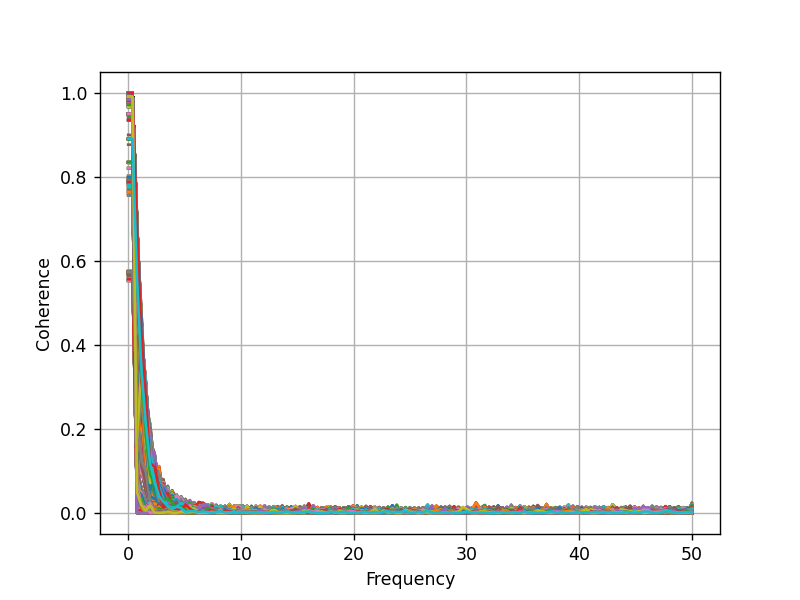

check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1
check2
check1

In [12]:
#loop  start om 9u56
mydir = "C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Datasets/All_freqs"

c1 = np.repeat("", 1)
c2 = np.repeat("",1)

ROI_base = numpy.zeros(shape=(1,2))
ROI_ar = np.column_stack([c1, c2, ROI_base])
ROI_tot= np.column_stack([c1, c2, ROI_base])
varkeep = {}

indices = [7,  13, 15, 16, 17,18, 19, 20, 21, 30, 31, 33,35, 36, 45, 51, 53, 54, 55, 56, 57, 58, 59, 68, 69, 71 , 73,74]
counter = 0
loop = 1

NS_arr = np.arange(0,26, 0.25)

for i in range(101):
    if i == 0:
        pass 
    else:
        value = 10**-6
        NS = NS_arr[i] 
        
        #create simulator 
        sim = simulator.Simulator(model = oscilator, connectivity = white_matter,
                          coupling = white_matter_coupling, 
                          integrator = integrators.EulerStochastic(dt=0.01220703125, noise=noise.Additive(noise_seed = int(NS), nsig=numpy.array([value]))),
                        monitors =  what_to_watch, stimulus = stimulus)

        sim.configure()

        print("check1")
        
        #Perform the simulation
        raw_data = []
        raw_time = []

        for raw, tavg in sim(simulation_length=2500):
            if not raw is None:
                raw_time.append(raw[0])
                raw_data.append(raw[1])
    
        #Make the lists numpy.arrays for easier use.
        RAW = numpy.array(raw_data)
        RAW_real = RAW[:, 0, :, 0]
        
        print("check2")
        
        counter = 0
        for ROI1 in indices:
            for ROI2 in indices:
                if ROI1 == ROI2:
                    pass
                elif ROI1 > ROI2:
                    pass
                else:
                    x = RAW_real[:,ROI1]
                    y = RAW_real[:,ROI2]
                    
                    #delete the first 500ms
                    list_deleterows = [*range(0,46000,1)]
                    x = np.delete(x, list_deleterows, 0)
                    y =  np.delete(y, list_deleterows, 0)
                    
                    cxy, f = cohere(x, y, 256, 1. / dt)
                    cxy_low, f_low = cxy[21:26], f[21:26]

                    
                    #make matrix of coherence measures
                    coh_low = cxy_low
                
                        
                    if counter == 0:
                        coh_low_tot = coh_low
                        if loop == 1:
                            ROI_tot[0][0] = str(regions[ROI1])
                            ROI_tot[0][1] = str(regions[ROI2])
                            ROI_tot[0][2] = ROI1
                            ROI_tot[0][3] = ROI2

                    else:
                        tuplex = (coh_low_tot, coh_low)
                        coh_low_tot = np.vstack(tuplex)
                        if loop == 1:
                            ROI_ar[0][0] = str(regions[ROI1])
                            ROI_ar[0][1] = str(regions[ROI2])
                            ROI_ar[0][2] = ROI1
                            ROI_ar[0][3] = ROI2
                            tupleROI = (ROI_tot, ROI_ar)
                            ROI_tot = np.vstack(tupleROI)
                        
                    counter = counter + 1
                    
                    
                    
        #load in depressed brains 
        varkeep["data" + str(i)] = coh_low_tot
        
        loop = loop + 1
        
print('prepare to stack')
#hstack all arrays to get all coherences corresponding to one ROI pair from all the 100 brains in one row
namelist = []
for i in range(101):
    if i == 0:
        pass
    else:
        name = varkeep["data" + str(i)] 
        namelist.append(name)

nametup = tuple(namelist)
array = np.hstack(nametup)
        
file_name = mydir + "/LF_coh_total_hstacked" + str(i) + ".h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('data', data=array)
h5f.close()

file_name = mydir + "/LF_ROI_order.csv"
outcome = pd.DataFrame.from_records(ROI_tot)
outcome.columns = ["ROI1", "ROI2", "ROI1_nr", "ROI2_nr"]
outcome.to_csv(path_or_buf = file_name, index = False)

list_deleterows = [*range(0,46000,1)]
raw_time = np.delete(raw_time, list_deleterows, 0)
        
file_name = mydir + "/Time_LF.h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('time', data=raw_time)
h5f.close()

In [ ]:
array = np.hstack(nametup)

In [ ]:
print(shape(array))

In [ ]:
print(array)

In [ ]:
x = mean(array[0]) #geeft gemiddelde van eerste rij = dus gemiddeld van eerste ROI paar